In [10]:
from qsim import *
from qsim.exact import *
import numpy as np
from functools import partial
%matplotlib nbagg

### Hamiltonians

- h_3 and u_3 are hamiltonian and unitaries for constant Z and X rotation (amp modulates X rotation and detuning modulates Z rotation)
- h_4 and h_5 are hamiltonians for constant Z rotation and time dependent X rotation modulated by a cosine and sine respectively (amp and detuning as above)

### Exact unitary evolution

In [11]:
x0 = normalise_state_vector([1, 1])
x1 = normalise_state_vector([1, 0])

<IPython.core.display.Javascript object>


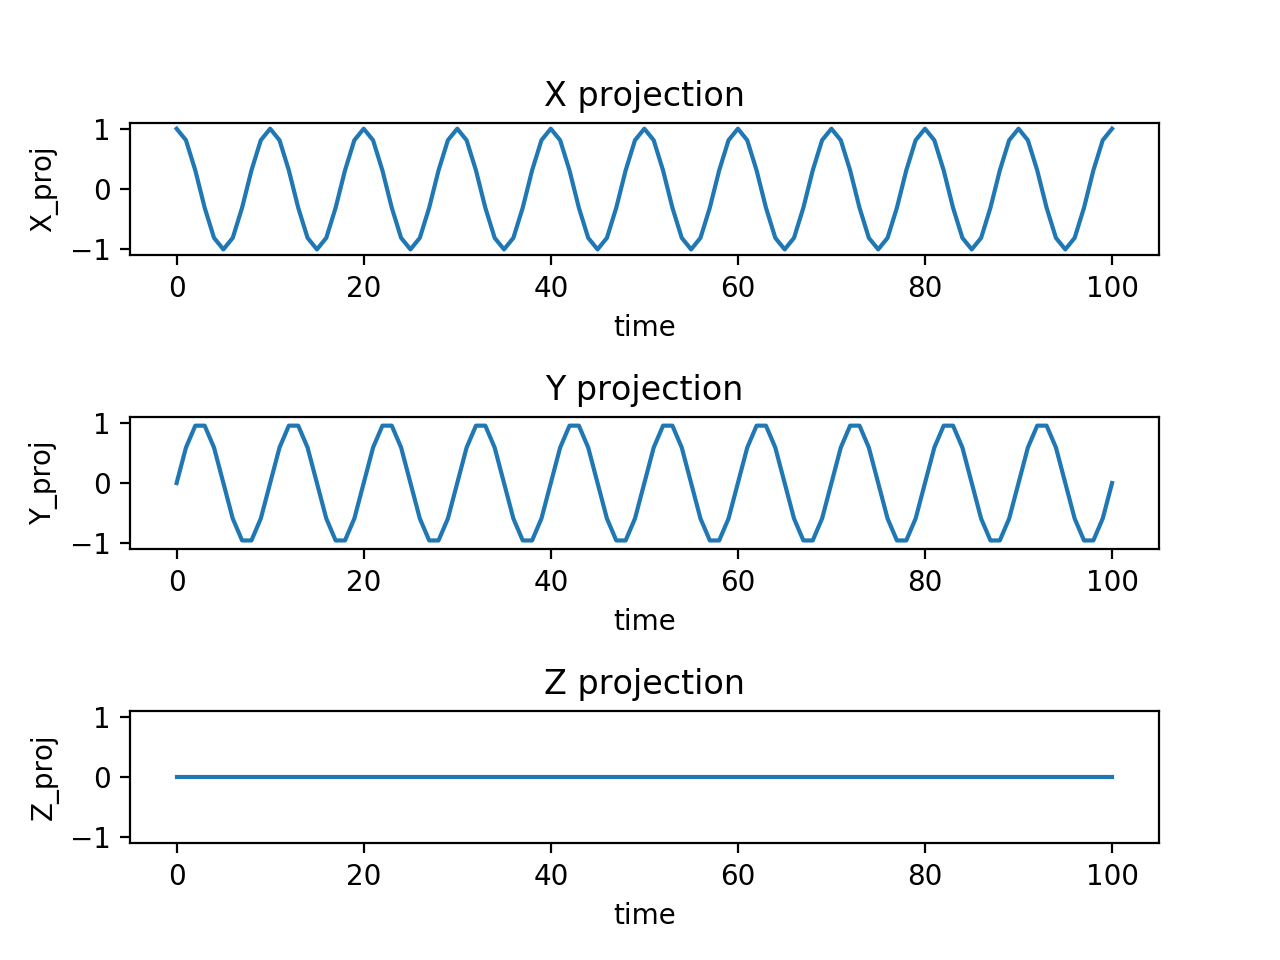

In [12]:
t, x = time_evolution([x0], create_u1, 0.1, 10, detuning=1)
pl = plot_projections(x)

<IPython.core.display.Javascript object>


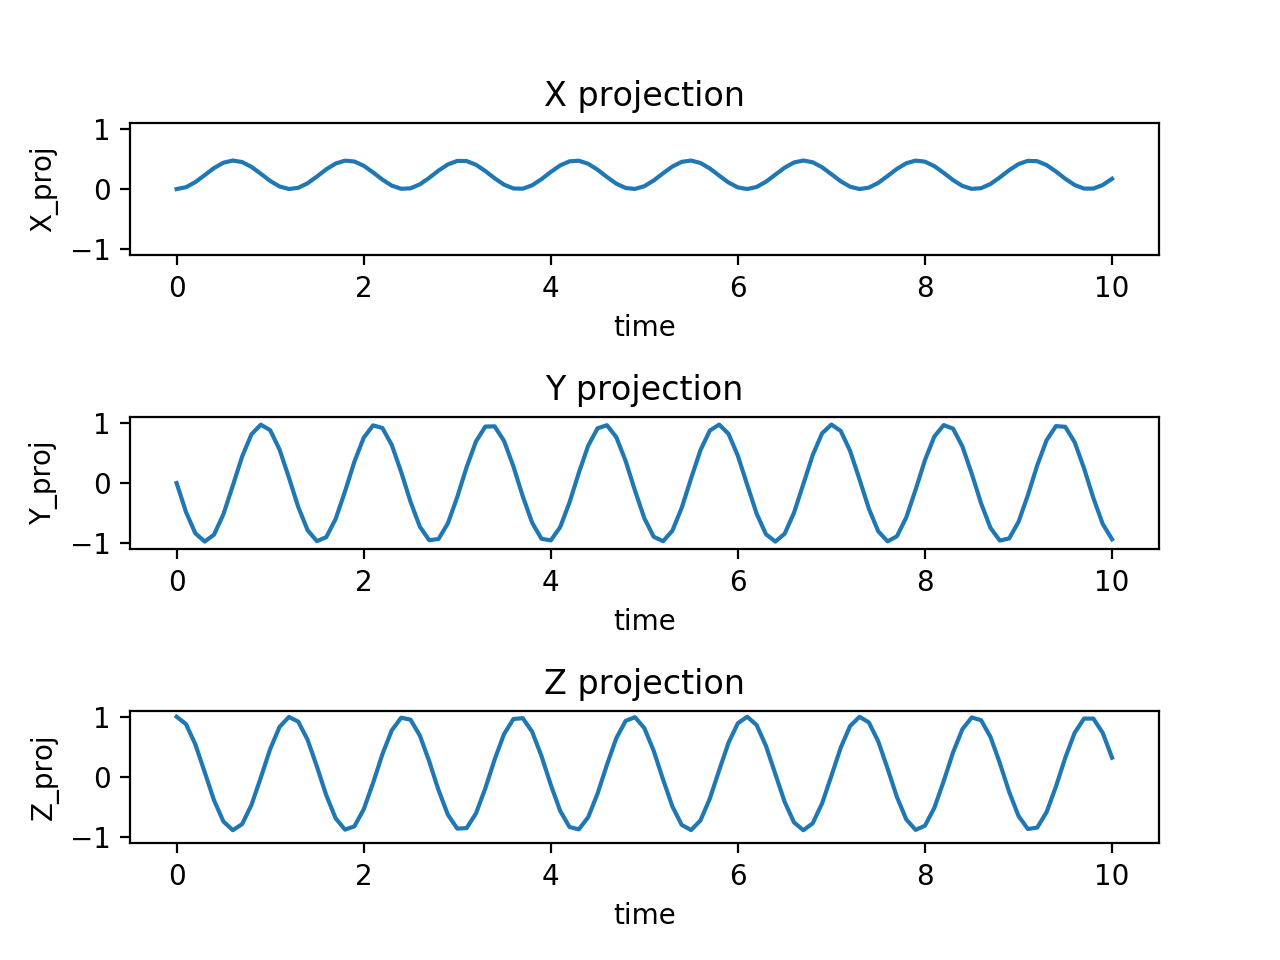

In [4]:
t, x = time_evolution([x1], create_u3, 0.1, 10, detuning=0.2, amp=5)
pl = plot_projections(x, t)

<IPython.core.display.Javascript object>


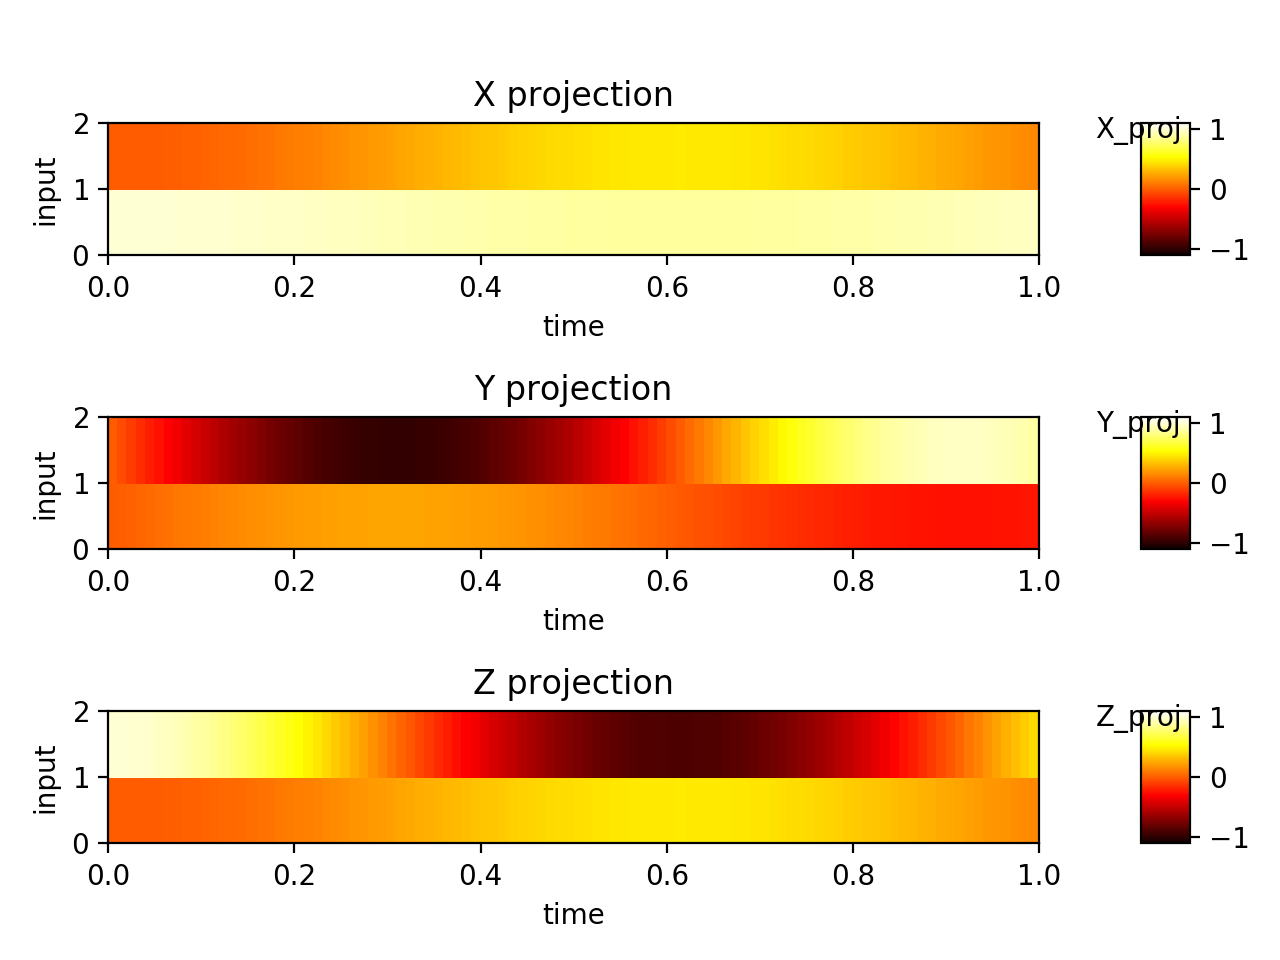

In [13]:
t, x = time_evolution([x0, x1], create_u3, 0.01, 1, detuning=0.2, amp=5)
pl = plot_projections(x, x_axis=t)

#### detuning sweep

In [6]:
pi_half_duration = 15.7e-9
pi_half_amp = 80e6
pi_half = partial(action, create_u3, t=pi_half_duration, amp=pi_half_amp)
pi_half_neg = partial(action, create_u3, t=pi_half_duration, amp=-1 * pi_half_amp)

<IPython.core.display.Javascript object>


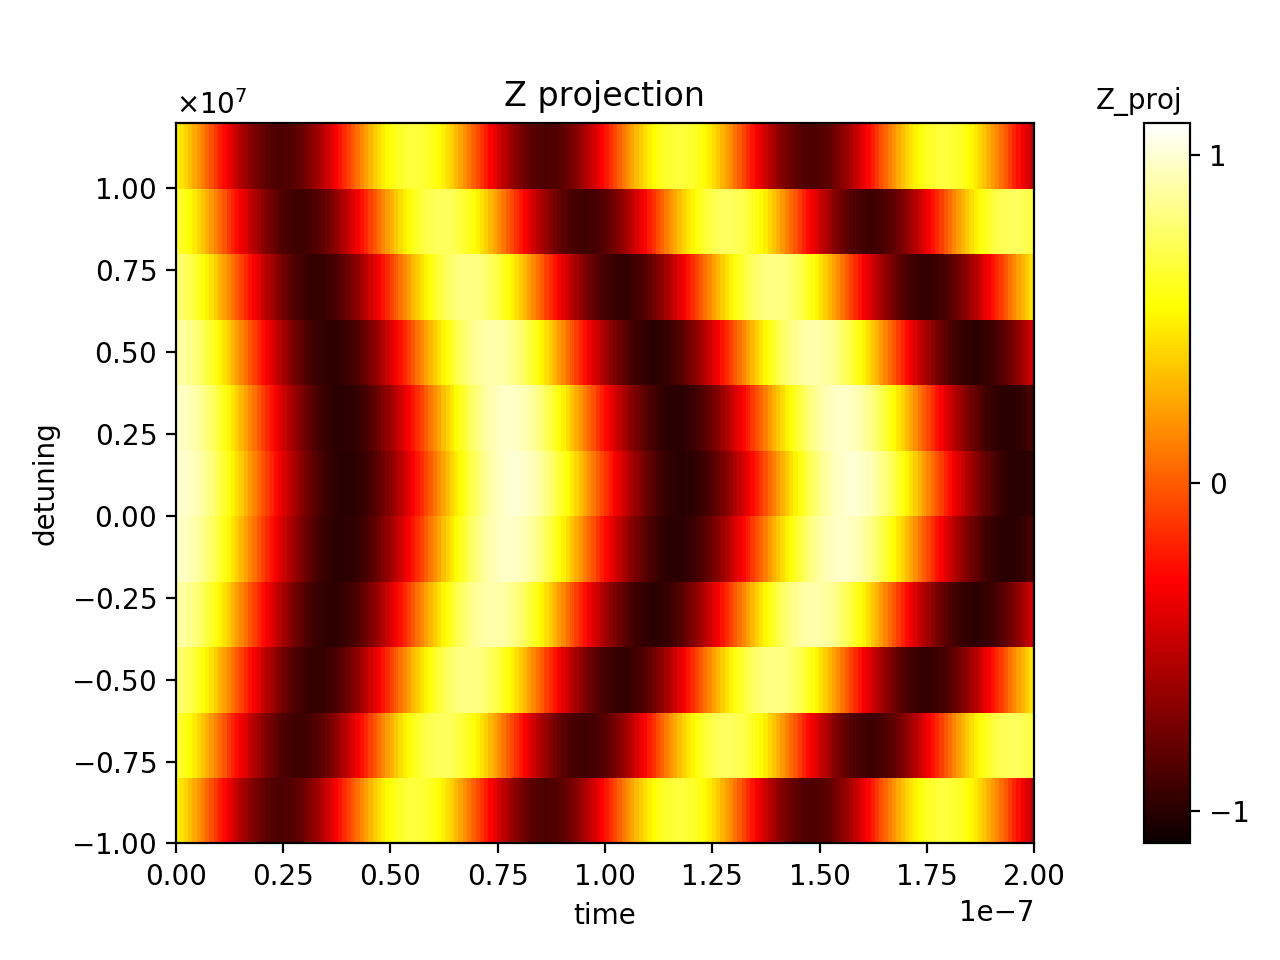

In [17]:
amp = 80e6
x, y, z = detuning_sweep(x1, create_u3, -10e6, 10e6, 2e6, 1e-9, 2e-7, amp=80e6
                                 ,action_before=pi_half
                                 ,action_after=pi_half_neg)
pl = plot_projections(z, x_axis=x, y_axis=y, axes_labels=['time', 'detuning'], projection_axes=['z'])

### Runge Kutta evolution

In [2]:
from qsim.rk4.evolution_methods import *

In [25]:
variables = ['time', 'detuning']
values = [[0, 1, 2], [100, 200]]
kw_copy = {}
while len(variables > 0):
    kw[variables.pop()]
    kw[variables.pop()] = values.pop()

#### detuning sweep

<IPython.core.display.Javascript object>


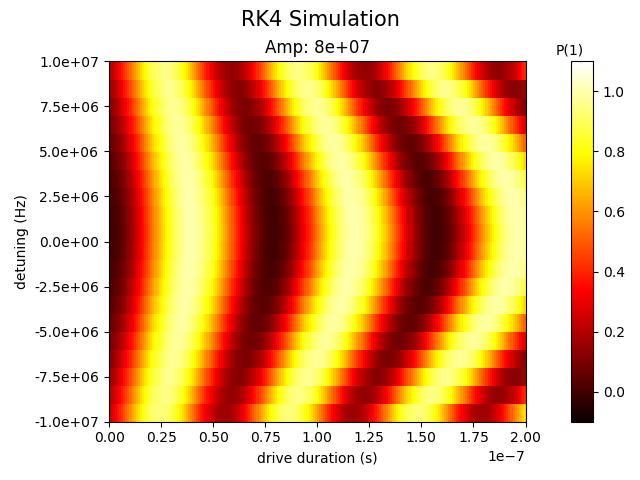

In [9]:
amp = 80e6
x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], RK4, h_3, 1e-9, 2e-7
                              ,amp=amp
                             ,action_before=pi_half
                            ,action_after=pi_half_neg)
f = plot_sim(x, y, z, amp=amp, title='RK4 Simulation')
# f.savefig(location+'exact_unitary_rabis.png')

<IPython.core.display.Javascript object>


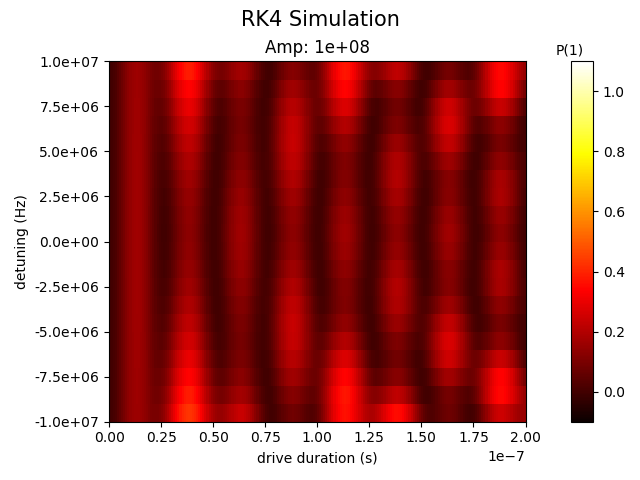

In [10]:
amp = 100e6
mod_freq = 20e6
x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], RK4, h_4, 1e-9, 2e-7,
                            amp=amp, mod_freq=mod_freq)
f = plot_sim(x, y, z, amp=amp, title='RK4 Simulation')

<IPython.core.display.Javascript object>


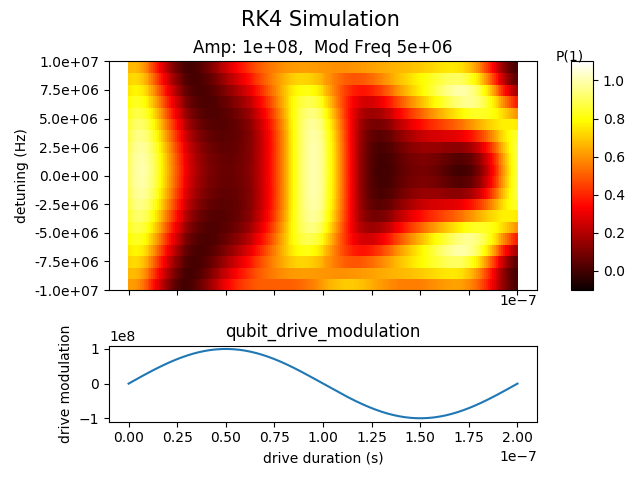

In [12]:
amp = 100e6
mod_freq = 5e6
x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], RK4, h_4, 1e-9, 2e-7,
                            amp=amp, mod_freq=mod_freq,
                             action_before=pi_half,
                            action_after=pi_half)
mod_array = amp * np.sin(2 * np.pi * mod_freq * x)
f = plot_sim_mod(x, y, z, mod_array, amp=amp, mod_freq=mod_freq,
                 title='RK4 Simulation')

/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/execution_methods.py:57: RuntimeWarning: invalid value encountered in multiply
  k1 = -1j * hamiltonian(t[i - 1], x[i - 1], **kwargs)
/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/projections.py:19: RuntimeWarning: overflow encountered in cdouble_scalars
  for m in x]).real
/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/projections.py:19: RuntimeWarning: invalid value encountered in cdouble_scalars
  for m in x]).real
/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/execution_methods.py:58: RuntimeWarning: invalid value encountered in multiply
  k2 = -1j * hamiltonian(t[i - 1], x[i - 1] + (step / 2) * k1, **kwargs)
/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/execution_methods.py:59: RuntimeWarning: invalid value encountered in multiply
  k3 = -1j * hamiltonian(t[i - 1], x[i - 1] + (step / 2) * k2, **kwargs)
/Users/natalie/Do

<IPython.core.display.Javascript object>


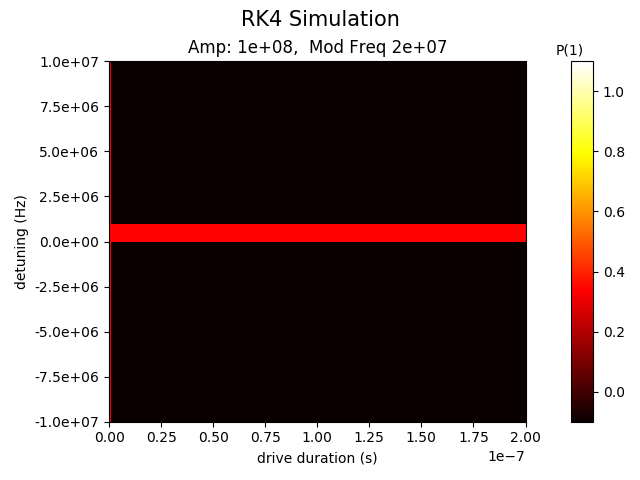

<IPython.core.display.Javascript object>


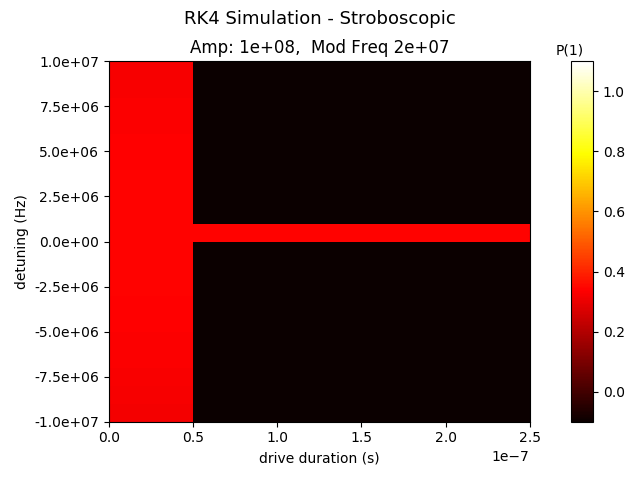

In [15]:
amp = 100e6
mod_freq = 20e6
sr = 1e9

x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], RK4, h_6, 1/sr, 2e-7,
                          action_before=pi_half,
                            amp=amp, mod_freq=mod_freq)
f = plot_sim(x, y, z, amp=amp, mod_freq=mod_freq, title='RK4 Simulation')
f2 = plot_sim_stroboscopic(x, y, z, sr, amp=amp, mod_freq=mod_freq,
                            title='RK4 Simulation - Stroboscopic')